In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

femtemp = pd.read_csv('femtemp.csv')
femact = pd.read_csv('femact.csv')
maletemp = pd.read_csv('maletemp.csv')
maleact = pd.read_csv('maleact.csv')
femtemp.index = range(len(femtemp))
femact.index = range(len(femact))
maletemp.index = range(len(maletemp))
maleact.index = range(len(maleact))

In [3]:
female = pd.merge(femtemp, femact, left_index=True, right_index=True, suffixes=("_temp", "_activity"))
male = pd.merge(maletemp, maleact, left_index=True, right_index=True, suffixes=("_temp", "_activity")) 
temp = pd.merge(femtemp, maletemp, left_index=True, right_index=True)
activity = pd.merge(femact, maleact, left_index=True, right_index=True)
df = pd.merge(female, male, left_index=True, right_index=True)
temp

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,37.11,37.91,36.85,38.20,37.54,37.04,37.41,36.35,37.47,37.99,...,36.48,37.10,36.16,36.85,36.08,36.86,36.68,36.41,36.93,37.00
1,37.13,37.98,36.78,38.19,37.55,37.06,37.46,36.41,37.53,37.99,...,36.44,37.10,36.05,36.91,36.11,36.84,36.71,36.38,36.83,37.06
2,37.19,37.98,36.76,38.14,37.55,37.09,37.56,36.50,37.53,37.96,...,36.37,37.23,35.95,36.93,36.12,36.89,36.72,36.33,36.76,37.06
3,37.20,37.96,36.72,37.95,37.54,37.11,37.74,36.55,37.46,37.93,...,36.27,37.33,35.80,37.00,36.10,36.84,36.69,36.27,36.72,37.01
4,37.22,37.95,36.64,37.80,37.53,37.09,37.73,36.63,37.51,37.87,...,36.63,37.36,35.80,37.06,36.18,36.84,36.62,36.22,36.67,36.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,36.93,37.16,36.45,37.05,37.59,37.38,37.54,36.92,36.64,37.33,...,37.00,37.38,37.00,35.96,37.00,36.38,37.02,35.78,36.68,37.00
20156,37.00,37.00,36.46,36.99,37.62,37.38,37.53,36.85,36.63,37.37,...,37.00,37.14,37.00,35.90,37.00,36.44,37.06,35.78,36.91,37.00
20157,37.08,37.10,36.48,36.96,37.67,37.40,37.47,36.85,36.65,37.33,...,37.00,37.21,37.00,35.84,37.00,36.42,37.09,35.82,37.05,37.00
20158,37.10,37.26,36.51,36.95,37.63,37.46,37.49,36.86,36.85,37.22,...,37.00,37.35,37.00,35.80,37.00,36.49,37.09,35.77,37.19,37.00


## Plot 1: Daytime vs Nighttime

In [4]:
lights = []
for i in range(0, len(temp), 1440):
    lights.extend(['Nighttime'] * 720 + ['Daytime'] * 720)
temp["lights"] = lights

labels = np.array([f"Night {i//2 + 1}" if i % 2 == 0 else f"Day {i//2 + 1}" for i in range(20160 // 720)])

temp['Time'] = np.repeat(labels, 720)

temp["Female"] = temp.loc[:, "f1":"f13"].mean(axis=1)
temp["Male"] = temp.loc[:, "m1":"m13"].mean(axis=1)

In [5]:
temp

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,m8,m9,m10,m11,m12,m13,lights,Time,Female,Male
0,37.11,37.91,36.85,38.20,37.54,37.04,37.41,36.35,37.47,37.99,...,36.08,36.86,36.68,36.41,36.93,37.00,Nighttime,Night 1,37.288462,36.501538
1,37.13,37.98,36.78,38.19,37.55,37.06,37.46,36.41,37.53,37.99,...,36.11,36.84,36.71,36.38,36.83,37.06,Nighttime,Night 1,37.323077,36.488462
2,37.19,37.98,36.76,38.14,37.55,37.09,37.56,36.50,37.53,37.96,...,36.12,36.89,36.72,36.33,36.76,37.06,Nighttime,Night 1,37.337692,36.493077
3,37.20,37.96,36.72,37.95,37.54,37.11,37.74,36.55,37.46,37.93,...,36.10,36.84,36.69,36.27,36.72,37.01,Nighttime,Night 1,37.338462,36.490769
4,37.22,37.95,36.64,37.80,37.53,37.09,37.73,36.63,37.51,37.87,...,36.18,36.84,36.62,36.22,36.67,36.88,Nighttime,Night 1,37.310769,36.530769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,36.93,37.16,36.45,37.05,37.59,37.38,37.54,36.92,36.64,37.33,...,37.00,36.38,37.02,35.78,36.68,37.00,Daytime,Day 14,37.042308,36.592308
20156,37.00,37.00,36.46,36.99,37.62,37.38,37.53,36.85,36.63,37.37,...,37.00,36.44,37.06,35.78,36.91,37.00,Daytime,Day 14,37.045385,36.618462
20157,37.08,37.10,36.48,36.96,37.67,37.40,37.47,36.85,36.65,37.33,...,37.00,36.42,37.09,35.82,37.05,37.00,Daytime,Day 14,37.070769,36.638462
20158,37.10,37.26,36.51,36.95,37.63,37.46,37.49,36.86,36.85,37.22,...,37.00,36.49,37.09,35.77,37.19,37.00,Daytime,Day 14,37.116154,36.656154


In [6]:
lights_temp = temp.groupby('lights').mean(numeric_only=True).reset_index()
lights_temp
lights_temp = lights_temp.melt(id_vars=["lights"], var_name="Mouse ID", value_name="Temperature (C)")
lights_temp

,lights,Mouse ID,Temperature (C)
0,Daytime,f1,36.775258
1,Nighttime,f1,37.998793
2,Daytime,f2,36.949431
3,Nighttime,f2,37.720151
4,Daytime,f3,36.667866
5,Nighttime,f3,37.427633
6,Daytime,f4,36.802228
7,Nighttime,f4,37.880967
8,Daytime,f5,37.166470
9,Nighttime,f5,38.357747


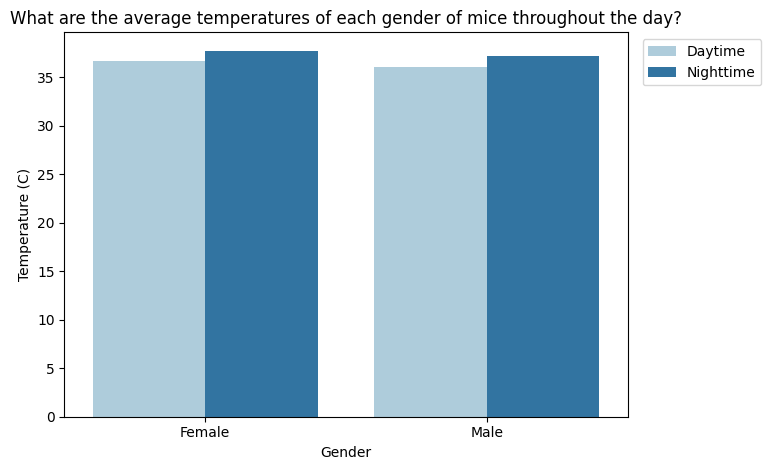

In [7]:
sns.barplot(data=lights_temp.iloc[52:], x='Mouse ID', y='Temperature (C)', hue='lights', palette='Paired')
plt.title('What are the average temperatures of each gender of mice throughout the day?')
plt.xlabel('Gender')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

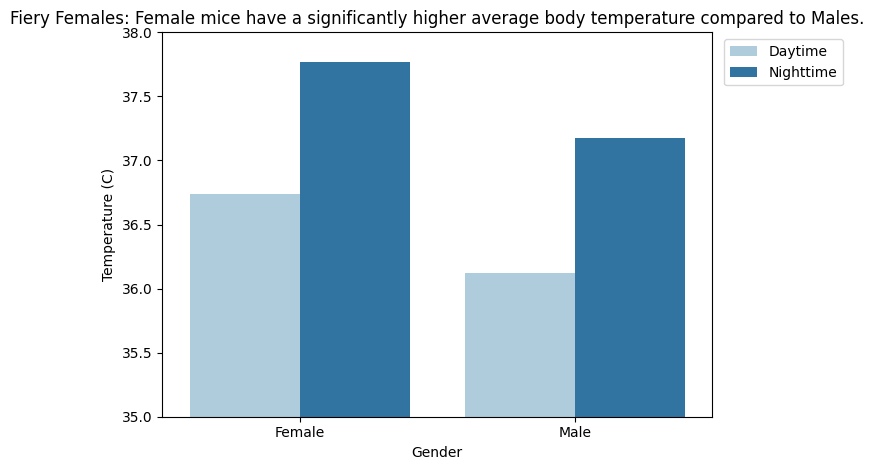

In [8]:
sns.barplot(data=lights_temp.iloc[52:], x='Mouse ID', y='Temperature (C)', hue='lights', palette='Paired')
plt.title('Fiery Females: Female mice have a significantly higher average body temperature compared to Males.')
plt.xlabel('Gender')
plt.ylim(35, 38) 
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

In [9]:
activity

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,25.0,62.0,0.0,61.0,0.0,10.0,31.0,7.0,76.0,33.0,...,39.0,3.0,0.0,1.0,13.0,24.0,0.0,0.0,0.0,0.0
1,26.0,28.0,4.0,53.0,0.0,35.0,11.0,0.0,39.0,82.0,...,70.0,38.0,24.0,0.0,6.0,74.0,0.0,0.0,6.0,0.0
2,35.0,40.0,5.0,23.0,0.0,42.0,38.0,0.0,41.0,60.0,...,1.0,0.0,6.0,17.0,22.0,7.0,9.0,0.0,0.0,0.0
3,63.0,7.0,2.0,43.0,0.0,0.0,23.0,43.0,83.0,8.0,...,56.0,18.0,14.0,26.0,24.0,32.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,38.0,3.0,0.0,21.0,0.0,30.0,0.0,...,101.0,55.0,68.0,21.0,0.0,57.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,0.0,27.0,0.0,0.0,76.0,0.0,45.0,0.0,3.0,42.0,...,0.0,78.0,0.0,0.0,0.0,55.0,75.0,24.0,71.0,0.0
20156,0.0,29.0,0.0,0.0,11.0,49.0,37.0,0.0,2.0,58.0,...,0.0,51.0,0.0,0.0,0.0,49.0,57.0,49.0,52.0,0.0
20157,3.0,66.0,0.0,7.0,14.0,28.0,3.0,0.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,18.0,0.0,75.0,0.0
20158,25.0,87.0,0.0,0.0,6.0,33.0,53.0,0.0,23.0,4.0,...,0.0,92.0,0.0,0.0,0.0,27.0,0.0,0.0,60.0,0.0


In [10]:
activity["lights"] = lights
activity['Time'] = np.repeat(labels, 720)
activity["Female"] = activity.loc[:, "f1":"f13"].mean(axis=1)
activity["Male"] = activity.loc[:, "m1":"m13"].mean(axis=1)
activity

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,m8,m9,m10,m11,m12,m13,lights,Time,Female,Male
0,25.0,62.0,0.0,61.0,0.0,10.0,31.0,7.0,76.0,33.0,...,13.0,24.0,0.0,0.0,0.0,0.0,Nighttime,Night 1,24.230769,11.230769
1,26.0,28.0,4.0,53.0,0.0,35.0,11.0,0.0,39.0,82.0,...,6.0,74.0,0.0,0.0,6.0,0.0,Nighttime,Night 1,22.461538,19.076923
2,35.0,40.0,5.0,23.0,0.0,42.0,38.0,0.0,41.0,60.0,...,22.0,7.0,9.0,0.0,0.0,0.0,Nighttime,Night 1,24.384615,6.769231
3,63.0,7.0,2.0,43.0,0.0,0.0,23.0,43.0,83.0,8.0,...,24.0,32.0,0.0,0.0,0.0,0.0,Nighttime,Night 1,22.076923,14.538462
4,0.0,0.0,0.0,38.0,3.0,0.0,21.0,0.0,30.0,0.0,...,0.0,57.0,0.0,0.0,0.0,0.0,Nighttime,Night 1,9.153846,27.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,0.0,27.0,0.0,0.0,76.0,0.0,45.0,0.0,3.0,42.0,...,0.0,55.0,75.0,24.0,71.0,0.0,Daytime,Day 14,19.769231,29.230769
20156,0.0,29.0,0.0,0.0,11.0,49.0,37.0,0.0,2.0,58.0,...,0.0,49.0,57.0,49.0,52.0,0.0,Daytime,Day 14,19.615385,27.692308
20157,3.0,66.0,0.0,7.0,14.0,28.0,3.0,0.0,17.0,0.0,...,0.0,4.0,18.0,0.0,75.0,0.0,Daytime,Day 14,14.153846,10.692308
20158,25.0,87.0,0.0,0.0,6.0,33.0,53.0,0.0,23.0,4.0,...,0.0,27.0,0.0,0.0,60.0,0.0,Daytime,Day 14,19.615385,14.615385


In [11]:
lights_activity = activity.groupby('lights').mean(numeric_only=True).reset_index()
lights_activity
lights_activity = lights_activity.melt(id_vars=["lights"], var_name="Mouse ID", value_name="Activity")
lights_activity

,lights,Mouse ID,Activity
0,Daytime,f1,8.372123
1,Nighttime,f1,23.921718
2,Daytime,f2,15.186093
3,Nighttime,f2,38.058632
4,Daytime,f3,11.116057
5,Nighttime,f3,19.975690
6,Daytime,f4,10.420695
7,Nighttime,f4,31.605259
8,Daytime,f5,10.754581
9,Nighttime,f5,41.069566


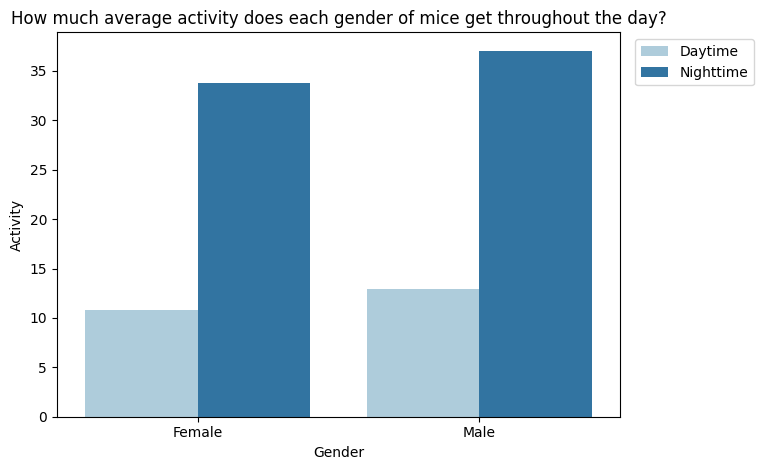

In [12]:
sns.barplot(data=lights_activity.iloc[52:], x='Mouse ID', y='Activity', hue='lights', palette='Paired')
plt.title('How much average activity does each gender of mice get throughout the day?')
plt.xlabel('Gender')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

In [13]:
activity_day = lights_activity[lights_activity['lights'] == 'Daytime']
activity_day

,lights,Mouse ID,Activity
0,Daytime,f1,8.372123
2,Daytime,f2,15.186093
4,Daytime,f3,11.116057
6,Daytime,f4,10.420695
8,Daytime,f5,10.754581
10,Daytime,f6,10.356864
12,Daytime,f7,7.208588
14,Daytime,f8,9.678869
16,Daytime,f9,17.324218
18,Daytime,f10,11.263294


C:\Users\ne5ye\AppData\Local\Temp\ipykernel_24548\2396917921.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_day.iloc[26:], x='Mouse ID', y='Activity', palette='husl')


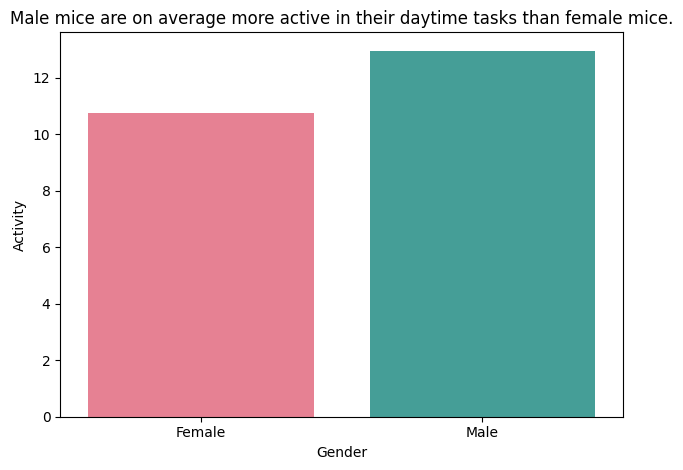

In [14]:
sns.barplot(data=activity_day.iloc[26:], x='Mouse ID', y='Activity', palette='husl')
plt.title('Male mice are on average more active in their daytime tasks than female mice.')
plt.xlabel('Gender')
plt.tight_layout()

In [15]:
time_activity = activity.groupby('Time').mean(numeric_only = True).reset_index()
time_activity
time_activity = time_activity.melt(id_vars=["Time"], var_name="Mouse ID", value_name="Activity")
time_activity

,Time,Mouse ID,Activity
0,Day 1,f1,8.647222
1,Day 10,f1,6.887500
2,Day 11,f1,8.879167
3,Day 12,f1,7.745833
4,Day 13,f1,8.213889
...,...,...,...
779,Night 5,Male,36.858254
780,Night 6,Male,35.996115
781,Night 7,Male,37.149016
782,Night 8,Male,36.212532


In [16]:
gendered_activity = time_activity[(time_activity['Mouse ID'] == 'Male') | (time_activity['Mouse ID'] == 'Female')]
gendered_activity

,Time,Mouse ID,Activity
728,Day 1,Female,10.400511
729,Day 10,Female,9.260335
730,Day 11,Female,11.024427
731,Day 12,Female,11.656867
732,Day 13,Female,11.412089
733,Day 14,Female,10.773643
734,Day 2,Female,11.318446
735,Day 3,Female,10.293857
736,Day 4,Female,11.068056
737,Day 5,Female,11.198134


In [17]:
gender_labels = np.array([f"Females at Daytime" if i // 14 == 0 else f"Females at Nighttime" if i // 14 == 1 else f"Males at Daytime" if i // 14 == 2 else f"Males at Nighttime" for i in range(56)])

gendered_activity['Categories'] = gender_labels
gendered_activity['Day'] = gendered_activity['Time'].str.extract('(\d+)').astype(int)

C:\Users\ne5ye\AppData\Local\Temp\ipykernel_24548\2244887527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gendered_activity['Categories'] = gender_labels
C:\Users\ne5ye\AppData\Local\Temp\ipykernel_24548\2244887527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gendered_activity['Day'] = gendered_activity['Time'].str.extract('(\d+)').astype(int)


In [18]:
gendered_activity

,Time,Mouse ID,Activity,Categories,Day
728,Day 1,Female,10.400511,Females at Daytime,1
729,Day 10,Female,9.260335,Females at Daytime,10
730,Day 11,Female,11.024427,Females at Daytime,11
731,Day 12,Female,11.656867,Females at Daytime,12
732,Day 13,Female,11.412089,Females at Daytime,13
733,Day 14,Female,10.773643,Females at Daytime,14
734,Day 2,Female,11.318446,Females at Daytime,2
735,Day 3,Female,10.293857,Females at Daytime,3
736,Day 4,Female,11.068056,Females at Daytime,4
737,Day 5,Female,11.198134,Females at Daytime,5


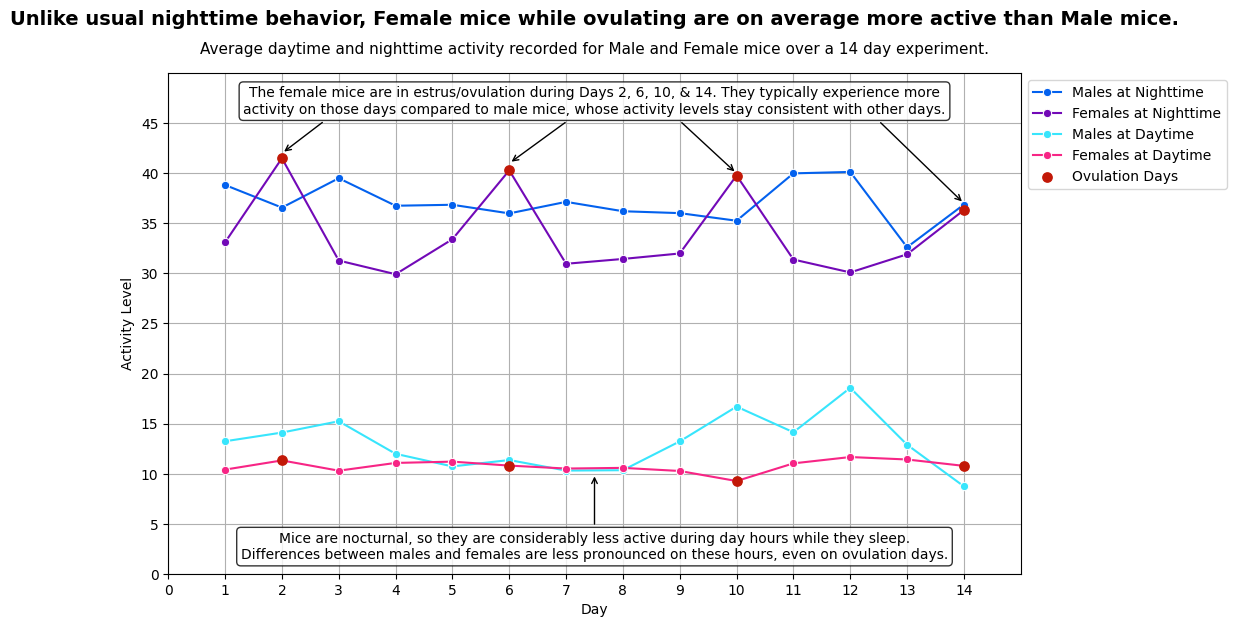

: 

In [ ]:
plt.figure(figsize=(11, 6.5))
sns.lineplot(
    data=gendered_activity, 
    x="Day", 
    y="Activity", 
    hue="Categories", 
    palette = {"Females at Daytime": "#F72585", "Females at Nighttime": "#7209B7", "Males at Daytime": "#38E5FC", "Males at Nighttime": "#0361EE"}, 
    hue_order = ["Males at Nighttime", "Females at Nighttime", "Males at Daytime", "Females at Daytime"],
    marker="o")

plt.xlabel("Day")
plt.ylabel("Activity Level")
plt.title("Unlike usual nighttime behavior, Female mice while ovulating are on average more active than Male mice.", fontsize=14, fontweight='bold', pad = 35)
plt.xlim(0, 15)
plt.ylim(0, 50)
plt.xticks(range(0, 15))
plt.yticks(range(0, 50, 5))
plt.grid(True)

plt.text(
    7.5, 52,  # Adjust position as needed
    'Average daytime and nighttime activity recorded for Male and Female mice over a 14 day experiment.',
    fontsize=11,
    ha='center'
)

def wrap_text(text, width):
    return "\n".join(textwrap.wrap(text, width))

plt.annotate(
    wrap_text("The female mice are in estrus/ovulation during Days 2, 6, 10, & 14. They typically experience more activity on those days compared to male mice, whose activity levels stay consistent with other days.", width = 100),
    xy=(6, 41), xycoords='data',
    xytext=(7.5, 46), textcoords='data',
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8),
    fontsize=10, color='black', ha='center'
)

plt.annotate(
    wrap_text("Mice are nocturnal, so they are considerably less active during day hours while they sleep. Differences between males and females are less pronounced on these hours, even on ovulation days.", width = 100),
    xy=(7.5, 10), xycoords='data',
    xytext=(7.5, 1.5), textcoords='data',
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8),
    fontsize=10, color='black', ha='center'
)

mask = ((gendered_activity['Categories'] == "Females at Nighttime") | (gendered_activity['Categories'] == "Females at Daytime")) & gendered_activity['Day'].isin([2, 6, 10, 14])

# Extract the x and y values for these points
red_points = gendered_activity[mask]

plt.scatter(
    red_points['Day'], 
    red_points['Activity'], 
    color='#C21807', 
    zorder=5, 
    s=45,
    label='Ovulation Days'
)

plt.annotate(
    "", 
    xy=(2, 42), 
    xytext=(2.75, 45.25),  
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    fontsize=10, color='black', ha='center'
)

plt.annotate(
    "", 
    xy=(10, 40), 
    xytext=(9, 45.25),  
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    fontsize=10, color='black', ha='center'
)

plt.annotate(
    "", 
    xy=(14, 37), 
    xytext=(12.5, 45.25),  
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    fontsize=10, color='black', ha='center'
)

plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')
plt.show()

In [20]:
deception = gendered_activity[(gendered_activity['Categories'] == 'Females at Daytime') | (gendered_activity['Categories'] == 'Males at Daytime')]
deception

,Time,Mouse ID,Activity,Categories,Day
728,Day 1,Female,10.400511,Females at Daytime,1
729,Day 10,Female,9.260335,Females at Daytime,10
730,Day 11,Female,11.024427,Females at Daytime,11
731,Day 12,Female,11.656867,Females at Daytime,12
732,Day 13,Female,11.412089,Females at Daytime,13
733,Day 14,Female,10.773643,Females at Daytime,14
734,Day 2,Female,11.318446,Females at Daytime,2
735,Day 3,Female,10.293857,Females at Daytime,3
736,Day 4,Female,11.068056,Females at Daytime,4
737,Day 5,Female,11.198134,Females at Daytime,5


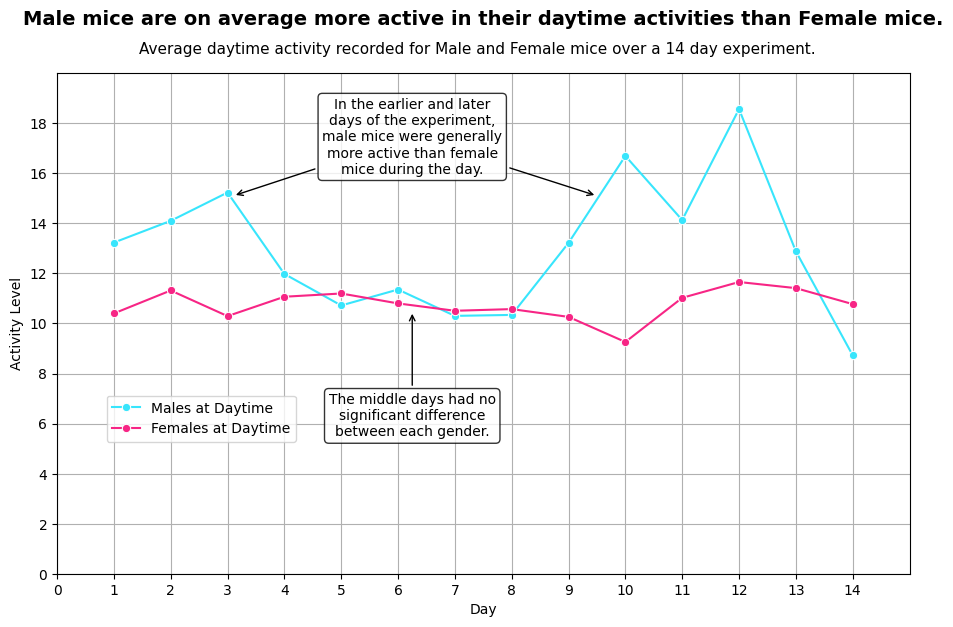

In [22]:
plt.figure(figsize=(11, 6.5))
sns.lineplot(
    data=deception, 
    x="Day", 
    y="Activity", 
    hue="Categories", 
    palette = {"Females at Daytime": "#F72585", "Males at Daytime": "#38e5fc"}, 
    hue_order = ["Males at Daytime", "Females at Daytime"], 
    marker="o"
)

# Customize the plot
plt.xlabel("Day")
plt.ylabel("Activity Level")
plt.title("Male mice are on average more active in their daytime activities than Female mice.", fontsize=14, fontweight='bold', pad = 35)
plt.legend(bbox_to_anchor=(0.05, 0.25), loc='lower left')
plt.xlim(0, 15)
plt.ylim(0, 20)
plt.xticks(range(0, 15))
plt.yticks(range(0, 20, 2))
plt.grid(True)

plt.text(
    7.4, 20.8,  # Adjust position as needed
    'Average daytime activity recorded for Male and Female mice over a 14 day experiment.',
    fontsize=11,
    ha='center'
)

plt.annotate(
    wrap_text("In the earlier and later days of the experiment, male mice were generally more active than female mice during the day.", width = 25),
    xy=(3.1, 15.1), xycoords='data',
    xytext=(6.25, 16), textcoords='data',
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8),
    fontsize=10, color='black', ha='center'
)

plt.annotate(
    "", 
    xy=(9.5, 15.1), 
    xytext=(7.92, 16.25),  
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    fontsize=10, color='black', ha='center'
)

plt.annotate(
    wrap_text("The middle days had no significant difference between each gender.", width = 25),
    xy=(6.25, 10.5), xycoords='data',
    xytext=(6.25, 5.5), textcoords='data',
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1),
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8),
    fontsize=10, color='black', ha='center'
)


# Show the plot
plt.show()